# The objective of this exercise is to predict RainTomorrow.

 1.Data Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Handling missing values

In [6]:
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe

In [8]:
print(missing_df)

               count  percentage
Date               0         0.0
Location           0         0.0
MinTemp         1485         1.0
MaxTemp         1261         0.9
Rainfall        3261         2.2
Evaporation    62790        43.2
Sunshine       69835        48.0
WindGustDir    10326         7.1
WindGustSpeed  10263         7.1
WindDir9am     10566         7.3
WindDir3pm      4228         2.9
WindSpeed9am    1767         1.2
WindSpeed3pm    3062         2.1
Humidity9am     2654         1.8
Humidity3pm     4507         3.1
Pressure9am    15065        10.4
Pressure3pm    15028        10.3
Cloud9am       55888        38.4
Cloud3pm       59358        40.8
Temp9am         1767         1.2
Temp3pm         3609         2.5
RainToday       3261         2.2
RainTomorrow    3267         2.2


In [9]:
# drop columns with a large of amount missing values
df = df.drop(['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'], axis=1)

In [10]:
# drop rows with missing labels - RainTomorrow
df = df.dropna(subset = ["RainTomorrow"])

In [11]:
df.shape

(142193, 19)

# populate the numerical and categorical variables

In [12]:
num_list = []
cat_list = []
for column in df:
    if column != 'RainTomorrow': # separate lable
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)

In [13]:
print(num_list)
print(cat_list)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [14]:
# Numerical Variables: impute missing values with mean
df.fillna(df.mean(), inplace=True)

In [15]:
# Categorical Variables: replace missing values with "Unknown"
for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna("Unknown", inplace=True)

2. Feature Engineering and EDA

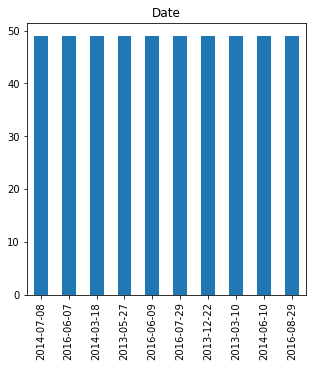

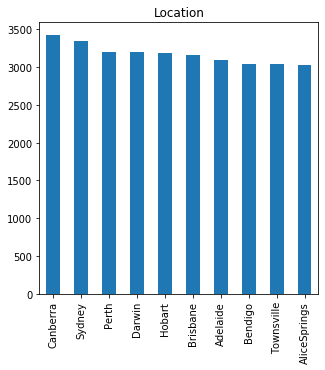

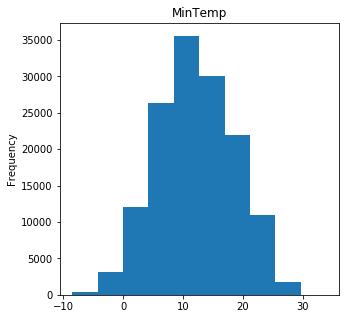

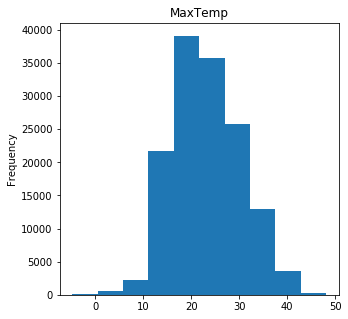

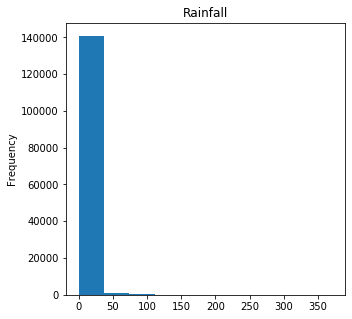

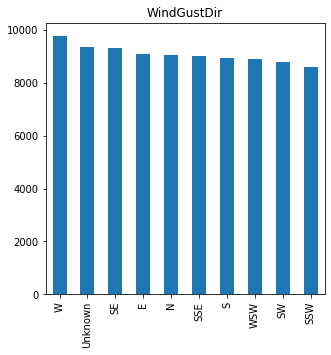

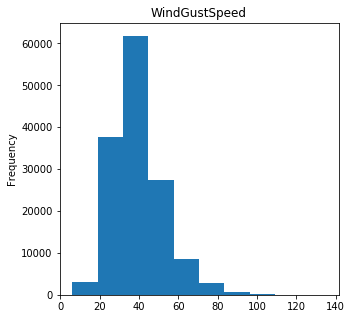

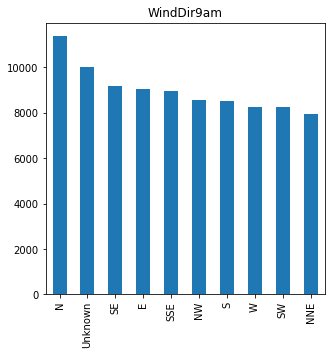

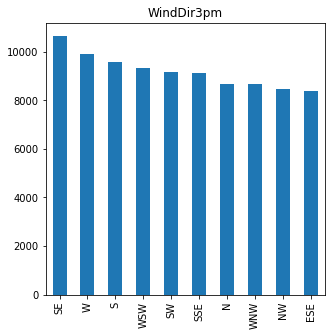

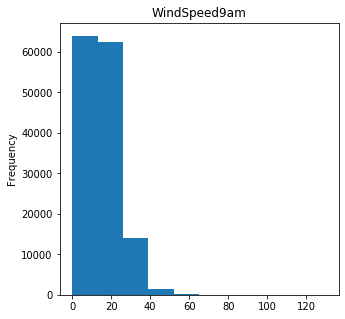

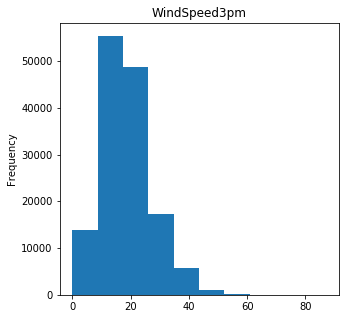

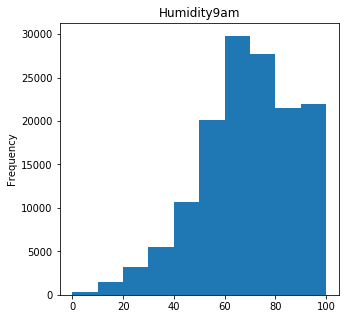

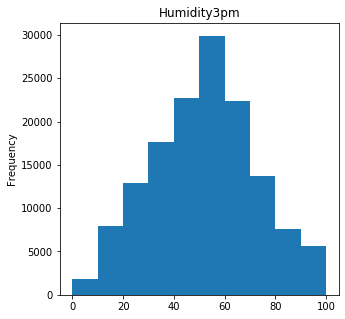

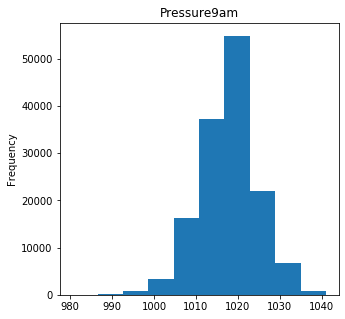

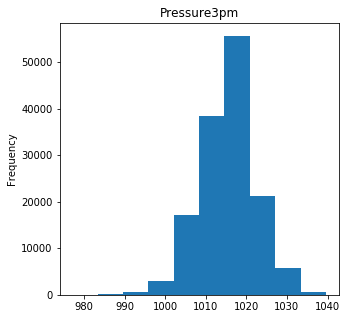

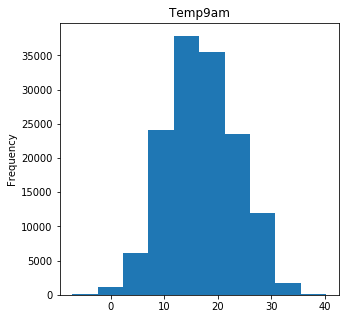

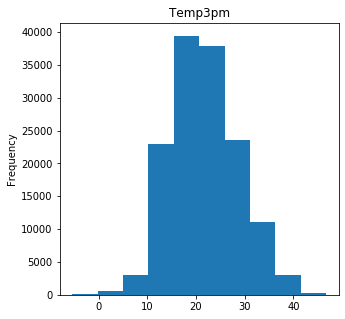

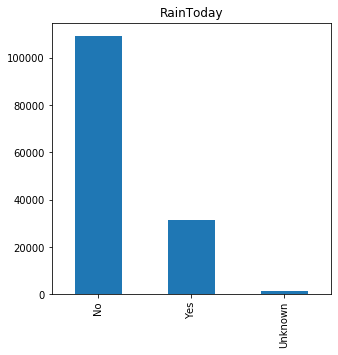

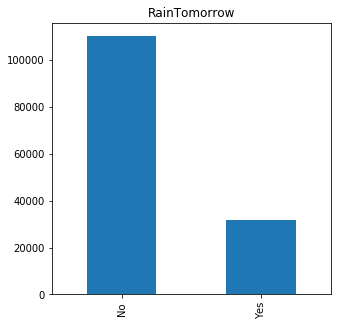

In [16]:
# univariate analysis
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')

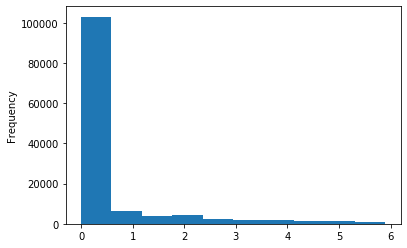

In [17]:
# address outliers in "Rainfall"
maximum = df['Rainfall'].quantile(0.9)
df = df[df["Rainfall"] < maximum]
df["Rainfall"].plot(kind = 'hist')

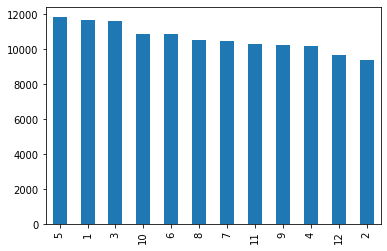

In [18]:
# date manipulation
df['Month'] = pd.to_datetime(df['Date']).dt.month.apply(str)
df['Month'].value_counts().plot(kind = 'bar')

In [19]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month', 'RainTomorrow']
for i in categorical_features:
    df[i] = LabelEncoder().fit_transform(df[i])

In [20]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,2,13.4,22.9,0.6,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,3
1,2008-12-02,2,7.4,25.1,0.0,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,3
2,2008-12-03,2,12.9,25.7,0.0,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,3
4,2008-12-05,2,17.5,32.3,1.0,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127798 entries, 0 to 145458
Data columns (total 20 columns):
Date             127798 non-null object
Location         127798 non-null int32
MinTemp          127798 non-null float64
MaxTemp          127798 non-null float64
Rainfall         127798 non-null float64
WindGustDir      127798 non-null int32
WindGustSpeed    127798 non-null float64
WindDir9am       127798 non-null int32
WindDir3pm       127798 non-null int32
WindSpeed9am     127798 non-null float64
WindSpeed3pm     127798 non-null float64
Humidity9am      127798 non-null float64
Humidity3pm      127798 non-null float64
Pressure9am      127798 non-null float64
Pressure3pm      127798 non-null float64
Temp9am          127798 non-null float64
Temp3pm          127798 non-null float64
RainToday        127798 non-null int32
RainTomorrow     127798 non-null int32
Month            127798 non-null int32
dtypes: float64(12), int32(7), object(1)
memory usage: 17.1+ MB


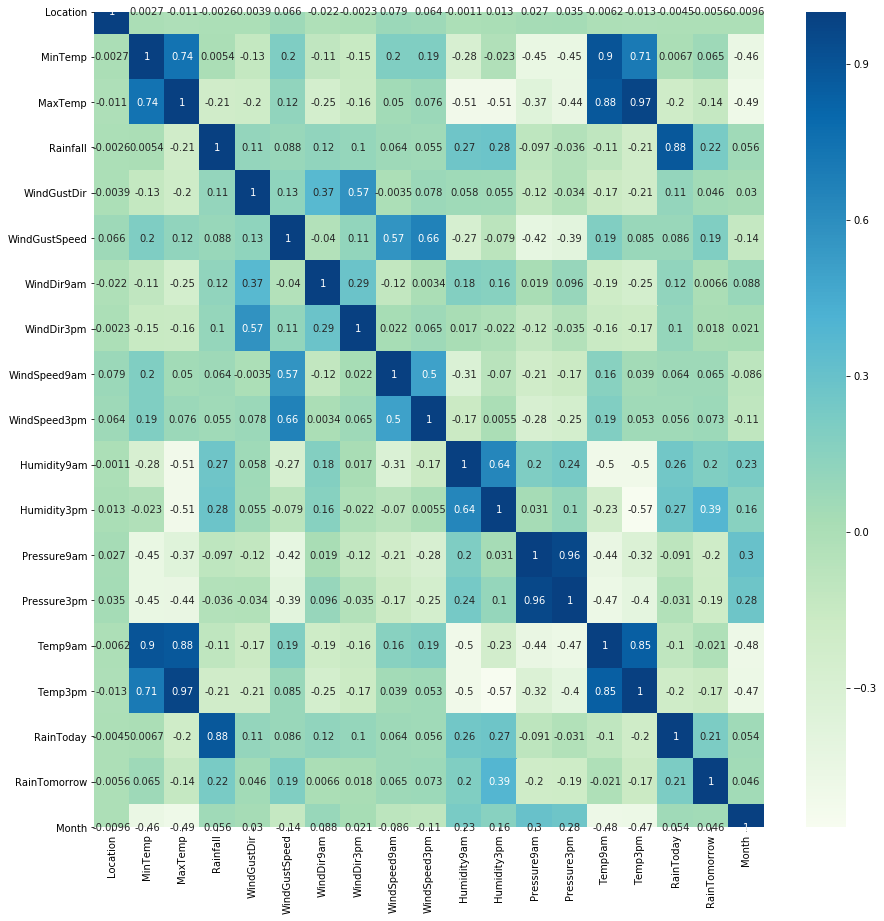

In [22]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

##Since logistic regression requires there to be little multicollinearity among predictors, I tried to keep only one variable in each group of highly correlated variables.

In [23]:
# drop and rearrange columns
df = df[['Month','Location', 'MinTemp','MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 
         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'RainToday', 'RainTomorrow']]

3.Model Building

In [24]:
# X - input feature matrix: Select all rows using ":" and select all the columns before the last using ":-1"
X = df.iloc[:,:-1]

# y- output target vector : Select all the targets using ":" and select the last column "-1"
y = df["RainTomorrow"]

In [25]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85624, 14) (42174, 14) (85624,) (42174,)


In [27]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)

C:\Users\91892\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = reg.predict(X_test)

4. Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix = (y_pred,y_test)

In [37]:
confusion_matrix

(array([0, 0, 0, ..., 0, 0, 0]), 132598    0
 72813     0
 72127     0
 129913    0
 42693     0
          ..
 34036     0
 101082    1
 121282    0
 27589     0
 53856     0
 Name: RainTomorrow, Length: 42174, dtype: int32)

In [38]:
from sklearn import metrics

In [39]:
# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [40]:
# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8501683501683501


AUC: 0.82


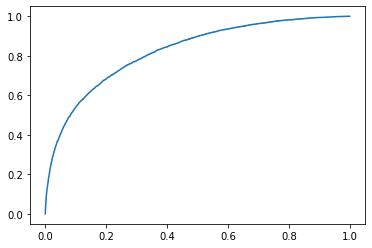

In [41]:
# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))